In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read and format date listings to datetime objects
data = pd.read_csv('job_posting_clean.csv')
data['original_listed_time'] = pd.to_datetime(data['original_listed_time'])
data['listed_time'] = pd.to_datetime(data['listed_time'])

# Segment data per month
monthly_data = {}
for i in range(1, 12, 1):
    monthly_data[i] = data[(data['original_listed_time'].dt.year == 2023) & (data['original_listed_time'].dt.month == i)]

# How do job postings vary over time?

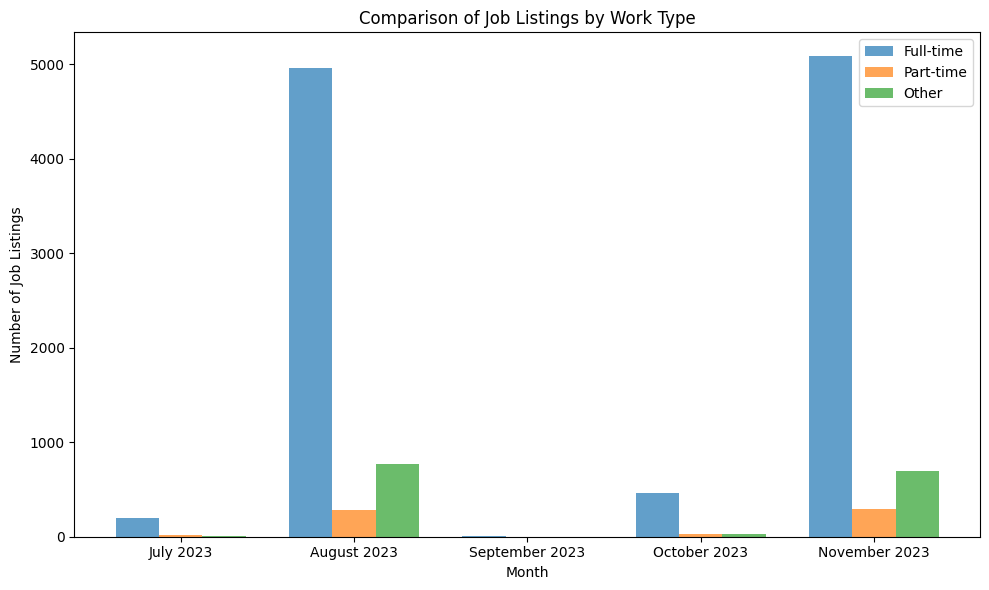

In [4]:
# How do job postings vary over time?
def get_work_type(month_data):
    full_time = {}
    part_time = {}
    others = {}
    for j in range(1, 12):
        if not month_data.get(j, pd.DataFrame()).empty:
            full_time[j] = (month_data[j]['formatted_work_type'] == 'Full-time').sum()
            part_time[j] = (month_data[j]['formatted_work_type'] == 'Part-time').sum()
            others[j] = (~month_data[j]['formatted_work_type'].isin(['Full-time', 'Part-time'])).sum()

    return full_time, part_time, others

def show_work_type_graph():
    full_time_counts, part_time_counts, other_counts = get_work_type(monthly_data)

    months = list(full_time_counts.keys())
    full_time_values = list(full_time_counts.values())
    part_time_values = list(part_time_counts.values())
    other_values = list(other_counts.values())

    fig, ax = plt.subplots(figsize=(10, 6))

    width = 0.25
    x_indexes = range(len(months))

    ax.bar([x - width for x in x_indexes], full_time_values, width=width, label='Full-time', alpha=0.7)
    ax.bar(x_indexes, part_time_values, width=width, label='Part-time', alpha=0.7)
    ax.bar([x + width for x in x_indexes], other_values, width=width, label='Other', alpha=0.7)

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Job Listings')
    ax.set_title('Comparison of Job Listings by Work Type')

    ax.set_xticks(x_indexes)
    ax.set_xticklabels(['July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023'])

    ax.legend()

    plt.tight_layout()
    plt.show()

show_work_type_graph()

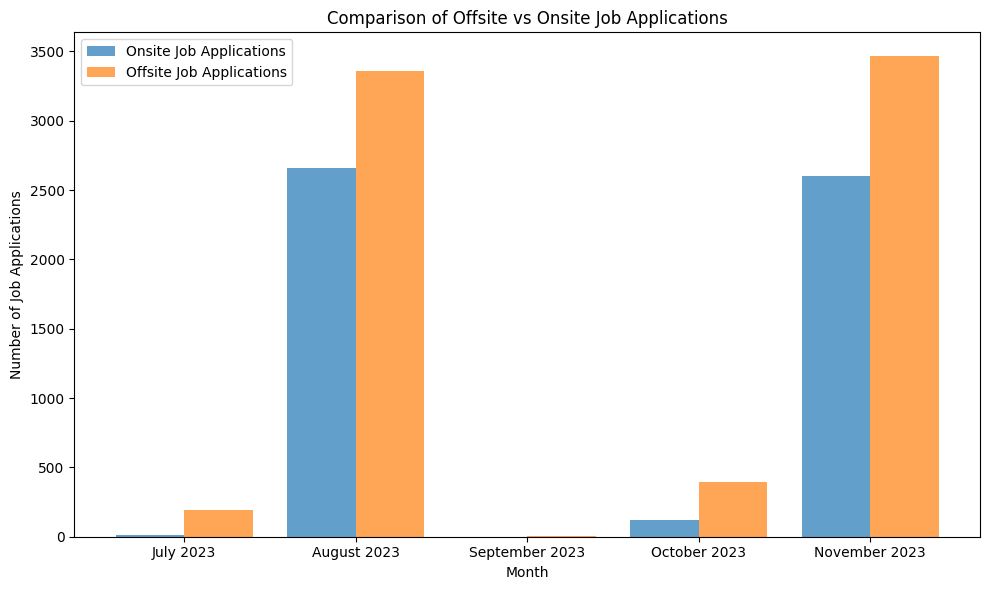

In [5]:
def get_application_type_count(month_data):
    onsite = {}
    offsite = {}
    for j in range(1, 12):
        if not month_data.get(j, pd.DataFrame()).empty:
            onsite[j] = (month_data[j]['application_type'].str.contains('Onsite', case=False, na=False)).sum()
            offsite[j] = (month_data[j]['application_type'].str.contains('Offsite', case=False, na=False)).sum()

    return onsite, offsite


def show_job_application_type_graph():
    onsite_jobs, offsite_jobs = get_application_type_count(monthly_data)

    months = list(onsite_jobs.keys())

    onsite_jobs_values = list(onsite_jobs.values())
    offsite_jobs_values = list(offsite_jobs.values())

    fig, ax = plt.subplots(figsize=(10, 6))

    width = 0.4
    x_indexes = range(len(months))

    ax.bar([x - width / 2 for x in x_indexes], onsite_jobs_values, width=width, label='Onsite Job Applications', alpha=0.7)
    ax.bar([x + width / 2 for x in x_indexes], offsite_jobs_values, width=width, label='Offsite Job Applications', alpha=0.7)

    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Job Applications')
    ax.set_title('Comparison of Offsite vs Onsite Job Applications')

    ax.set_xticks(x_indexes)
    ax.set_xticklabels(['July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023'])

    ax.legend()


    plt.tight_layout()
    plt.show()

show_job_application_type_graph()

# What are the most in demand jobs?

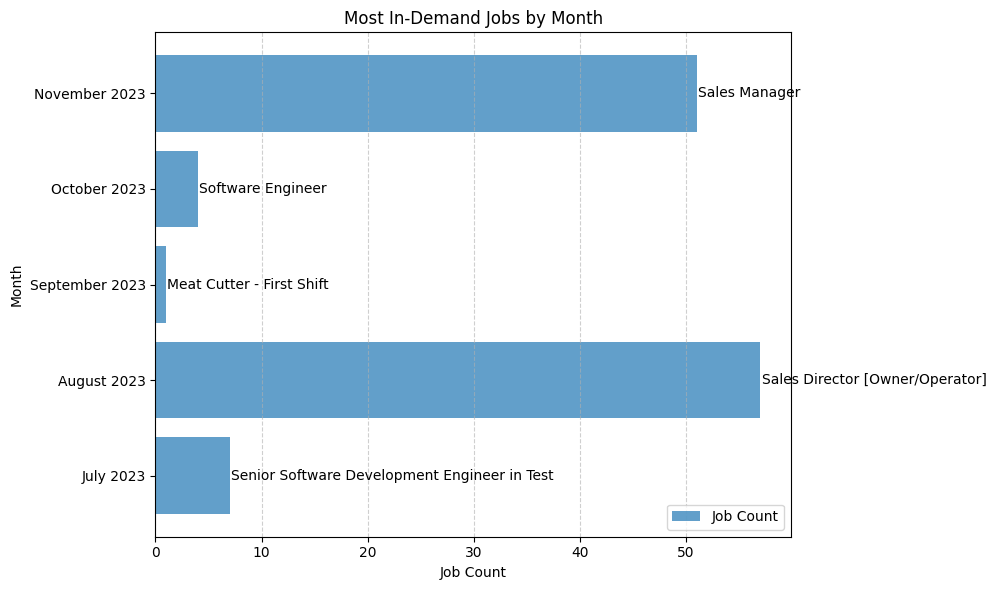

In [6]:
# What are the most in-demand jobs?
def get_in_demand_jobs(month_data):
    job_mode = {}
    job_count = {}
    for j in range(1, 12):
        if not month_data.get(j, pd.DataFrame()).empty:
            modes = month_data[j]['title'].mode()
            job_mode[j] = modes[0]
            job_count[j] = month_data[j]['title'].value_counts()[job_mode[j]]

    return job_mode, job_count

def show_in_demand_jobs_graph():
    job_mode, job_count = get_in_demand_jobs(monthly_data)

    months = [i for i in range(7, 12)]
    job_titles = [job_mode[i] for i in months]
    job_counts = [job_count[i] for i in months]

    month_names = ['July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023']

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.barh(month_names, job_counts, alpha=0.7, label="Job Count")

    for i, v in enumerate(job_counts):
        ax.text(v + 0.1, i, f'{job_titles[i]}', va='center', fontsize=10)

    ax.set_xlabel('Job Count')
    ax.set_ylabel('Month')
    ax.set_title('Most In-Demand Jobs by Month')

    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    ax.legend()

    plt.tight_layout()
    plt.show()

show_in_demand_jobs_graph()